# Contents:
* [1. Import Libraries & Data](#import-libraries)
* [2. Explorotary Data Analysis (EDA)](#eda)
* [3. Data Preprocessing](#data-preprocessing)
* [4. Models Experiments](#models)

<a id="import-libraries"></a>
# 1. Import Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# models 
from sklearn.linear_model import LinearRegression
from sklearn. linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from lightgbm import LGBMRegressor
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

# evaluation
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv('./data/processed/properties_descriptors.csv')

In [3]:
data.head()

,set,MWa,logKowb,Mptc,LogSaqd,LogSoce,Hdf,Hag,Texpi,Skin thicknessj,...,Kier2,Kier3,naAromAtom,ATSp1,ATSp2,ATSp3,ATSp4,ATSp5,nB,MolIP
0,t,139.10,1.91,387.0,-4.000000,-2.090000,1.0,4.0,298.0,0.100,...,3.408284,2.285714,6.0,373.777514,409.011832,503.255946,390.565769,173.603316,10.0,8.519901
1,t,171.03,2.92,270.0,-5.586217,-2.666217,0.0,0.0,305.0,0.128,...,3.111111,1.800000,6.0,463.175094,476.652907,530.316455,392.280643,151.974579,8.0,8.338537
2,t,171.03,2.92,270.0,-5.586217,-2.666217,0.0,0.0,305.0,0.075,...,3.111111,1.800000,6.0,463.175094,476.652907,530.316455,392.280643,151.974579,8.0,8.338537
3,t,108.10,1.04,258.0,-3.397940,-2.357940,1.0,1.0,298.0,0.100,...,3.111111,1.800000,6.0,343.647962,360.656857,405.171149,284.539313,96.667566,8.0,8.556987
4,t,184.27,3.67,183.0,-6.185314,-2.515314,0.0,2.0,305.0,0.128,...,8.591716,7.100592,0.0,588.801978,590.026029,630.062246,602.270174,511.259323,12.0,8.506996


In [4]:
data.shape

(446, 231)

In [5]:
# no missing values
data.isna().sum().sum()

0

In [6]:
data.columns

Index(['set', 'MWa', 'logKowb', 'Mptc', 'LogSaqd', 'LogSoce', 'Hdf', 'Hag',
       'Texpi', 'Skin thicknessj',
       ...
       'Kier2', 'Kier3', 'naAromAtom', 'ATSp1', 'ATSp2', 'ATSp3', 'ATSp4',
       'ATSp5', 'nB', 'MolIP'],
      dtype='object', length=231)

Our dependant variable is `logJmaxm`.

<a id="eda"></a>
# 2. EDA 

In [7]:
data.describe()

,MWa,logKowb,Mptc,LogSaqd,LogSoce,Hdf,Hag,Texpi,Skin thicknessj,logJmaxm,...,Kier2,Kier3,naAromAtom,ATSp1,ATSp2,ATSp3,ATSp4,ATSp5,nB,MolIP
count,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,...,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000
mean,219.000408,1.637578,388.484641,-5.112279,-3.474726,1.753363,3.116592,305.688341,0.095776,-7.734816,...,5.244013,3.201602,3.127803,1061.855585,1275.884588,1902.389252,1971.471627,1591.005454,16.479821,7.398420
std,102.304418,2.040348,99.352703,1.799958,1.384633,1.577133,2.160908,4.476074,0.021997,1.885531,...,2.385479,2.347868,3.517441,802.231063,1042.467656,1744.613586,1974.168242,1732.044180,8.897332,4.035565
min,32.000000,-4.670000,147.000000,-10.036208,-7.710959,0.000000,0.000000,295.000000,0.010000,-12.997493,...,0.000000,0.000000,0.000000,16.767526,8.308879,0.000000,0.000000,0.000000,1.000000,-41.331137
25%,130.100000,0.730000,315.500000,-6.207608,-4.310008,1.000000,2.000000,305.000000,0.100000,-9.012389,...,3.408284,1.926278,0.000000,387.392942,404.592769,452.775731,361.430471,164.402737,9.000000,7.374413
50%,192.185000,1.760000,425.000000,-5.414500,-3.596254,2.000000,3.000000,305.000000,0.100000,-7.828758,...,4.840894,2.587659,0.000000,635.114242,708.771377,935.183138,810.767934,511.259323,13.000000,8.211816
75%,313.194993,3.142607,454.000000,-3.886057,-2.381251,2.000000,4.000000,310.000000,0.100000,-6.291720,...,6.269630,3.515625,6.000000,1895.813072,2378.527364,3688.545926,3867.573605,3018.480519,24.000000,8.559448
max,504.400000,7.730000,573.000000,-1.240312,0.021162,11.000000,16.000000,312.000000,0.128000,-3.887336,...,17.052632,19.058824,16.000000,2982.306344,3787.026399,6247.898590,7539.131227,6991.783951,37.000000,10.165991


In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True);

Error in callback <function flush_figures at 0x0000019E9CE0DEA0> (for post_execute):


KeyboardInterrupt: 

<a id="data-preprocessing"></a>
# 3. Data Preprocessing

In [10]:
model_data = data.copy()

ohe = OneHotEncoder()
model_data['set'] = ohe.fit_transform(model_data['set'].values.reshape(-1, 1)).toarray()

In [11]:
X = model_data.drop(["logJmaxm"], axis=1)
y = model_data['logJmaxm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

print("Shape of X_train: {} \t Shape of y_train: {}".format(X_train.shape, y_train.shape))
print("Shape of X_test: {} \t Shape of y_test: {}".format(X_test.shape, y_test.shape))

Shape of X_train: (379, 230) 	 Shape of y_train: (379,)
Shape of X_test: (67, 230) 	 Shape of y_test: (67,)


<a id="models"></a>
# 4. Models Experiments

In [12]:
def evaluate_model(model_df, i, model_name, model, X, y, X_train, X_test, y_train, y_test):
    """
    this function is for regression takes the model with the data and calculate
    the scores, with cross validation techniques, in addition to MAE, MSE, RMSE, MAPE
    R Squared and Adjusted R Squared

    :param model: model
    :param X_train, X_test, y_train, y_test: data that was used
    """
    # scores with train and test data
    # print("All Data Score: {}".format(model.score(X, y)))
    # print("Train Score: {}".format(model.score(X_train, y_train)))
    # print("Test Score: {}\n".format(model.score(X_test, y_test)))

    # cross validation with 5 folds
    all_cv_5 = cross_val_score(model, X, y, cv=5)
    print("all CV 5: {}".format(all_cv_5))
    # print("Mean Cross-Validation score: {}".format(all_cv_5.mean()))

    # predictions from our model
    predictions = model.predict(X_test)

    # MAE, MAPE, MSE, RMSE
    # print("MAE: {}".format(mean_absolute_error(y_test, predictions)))
    # print("MAPE: {}".format(mean_absolute_percentage_error(y_test, predictions)))
    # print("MSE: {}".format(mean_squared_error(y_test, predictions)))
    # print("RMSE: {}\n".format(np.sqrt(mean_squared_error(y_test, predictions))))

    # calculating R squared and Adjusted R squared
    r_sqre = r2_score(y_test, predictions)
    n = len(y_test)
    p = X_test.shape[1] # number of independant features

    Adj_r2 = 1-(1-r_sqre)*(n-1)/(n-p-1)
    
    # print("R Squared: {}".format(r_sqre))
    # print("Adjusted R Squared: {}".format(((1 - r_sqre)* (N-1)) / (N-K-1)))
    
    train_mae = mean_absolute_error(y_train, model.predict(X_train))
    test_mae = mean_absolute_error(y_test, predictions)

    train_mse = mean_squared_error(y_train, model.predict(X_train))
    test_mse = mean_squared_error(y_test, predictions)

    train_rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    test_rmse = np.sqrt(mean_squared_error(y_test, predictions))

    


    print("=" * 40)
    model_df.loc[i] = [model_name, all_cv_5.mean(), train_mae,
                    test_mae, mean_absolute_percentage_error(y_test, predictions),
                    train_mse ,test_mse, train_rmse, test_rmse, r_sqre, Adj_r2]

    return model_df

In [13]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr = Pipeline([("scalar1", StandardScaler()),
                     ("lr", LinearRegression())])

pipeline_lasso = Pipeline([("scalar2", StandardScaler()),
                      ("lasso", Lasso())])

pipeline_dt = Pipeline([("scalar3", StandardScaler()),
                     ("dt", DecisionTreeRegressor())])

pipeline_rf = Pipeline([("scalar4", StandardScaler()),
                     ("rf", RandomForestRegressor())])

pipeline_kn = Pipeline([("scalar5", StandardScaler()),
                     ("kn", KNeighborsRegressor())])

pipeline_xgb = Pipeline([("scalar6", StandardScaler()),
                     ("xgb", XGBRegressor())])

pipeline_gbr = Pipeline([("scalar7", StandardScaler()),
                     ("gbr", GradientBoostingRegressor())])

pipeline_eln = Pipeline([("scalar8", StandardScaler()),
                     ("eln", ElasticNet())])

pipeline_sgdr = Pipeline([("scalar9", StandardScaler()),
                     ("sgdr", SGDRegressor())])

pipeline_br = Pipeline([("scalar10", StandardScaler()),
                     ("br", BayesianRidge())])

pipeline_cat = Pipeline([("scalar11", StandardScaler()),
                     ("cat", CatBoostRegressor(allow_writing_files=False))])

pipeline_lgbm = Pipeline([("scalar12", StandardScaler()),
                     ("lgmb", LGBMRegressor())])



# List of all the pipelines
pipelines = [pipeline_lr, pipeline_lasso, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb, pipeline_gbr,
            pipeline_eln, pipeline_sgdr, pipeline_br, pipeline_cat, pipeline_lgbm] # 

# Dictionary of pipelines and model types for ease of reference
pipeline_dict = {0: "LinearRegression", 1: "Lasso", 2: "DecisionTree", 3: "RandomForest", 4: "KNeighbors", 5: "XGBRegressor", 6: "GradientBoostingRegressor",
                7: "Elastic Net", 8: "SGDRegressor", 9:"BayesianRidge", 10: "CatBoostRegressor", 11: "LGBMRegressor"}
    #, 

models_scores_df = pd.DataFrame(columns=["model", "Mean CV", "MAE Train", "MAE Test",
                                         "MAPE", "MSE Train", "MSE Test", "RMSE Train",
                                          "RMSE Test", "R_Squared", "Adjusted_R_Squared"])


# Fit the pipelines and display the scores with Cross validation
for i, pipe in enumerate(pipelines):
    # getting the name of our model
    model_name = pipeline_dict[i]
    print(model_name)
    
    # fitting our data
    pipe.fit(X_train, y_train)
    
    evaluate_model(models_scores_df, i, model_name, pipe, X, y, X_train, X_test, y_train, y_test)

LinearRegression
all CV 5: [-2.07062215e+01 -2.69854598e+02 -2.68455180e+04 -1.08679095e+03
 -1.12293917e+01]
Lasso
all CV 5: [-0.13553904  0.18752968 -2.30292139  0.45715868 -0.14276368]
DecisionTree
all CV 5: [ 0.61216005  0.34062843 -0.14921418  0.52021655  0.71199541]
RandomForest
all CV 5: [ 0.72256965  0.69663159 -0.15486333  0.64407799  0.83279605]
KNeighbors
all CV 5: [0.37467157 0.3749239  0.33700425 0.72278043 0.50435682]
XGBRegressor
all CV 5: [0.74135895 0.67166615 0.45280027 0.80750853 0.85821977]
GradientBoostingRegressor
all CV 5: [0.79661253 0.71593276 0.23133173 0.71670321 0.83233539]
Elastic Net
all CV 5: [ 0.27990153  0.35267362 -1.66375593  0.69669761  0.49003676]
SGDRegressor
all CV 5: [-1.60649334e+02 -1.25760114e-01 -5.42810639e+01 -4.90385707e+02
 -4.50728474e+02]
BayesianRidge
all CV 5: [0.81312807 0.0428981  0.40028966 0.80014815 0.59784477]
CatBoostRegressor
Learning rate set to 0.035124
0:	learn: 1.8364737	total: 152ms	remaining: 2m 31s
1:	learn: 1.7950856	t

In [14]:
models_scores_df

,model,Mean CV,MAE Train,MAE Test,MAPE,MSE Train,MSE Test,RMSE Train,RMSE Test,R_Squared,Adjusted_R_Squared
0,LinearRegression,-5646.819825,0.264632,3.215326,0.517049,0.182509,135.768504,0.427211,11.651974,-36.995545,16.290890
1,Lasso,-0.387307,1.216709,1.297822,0.198810,2.112798,2.382235,1.453547,1.543449,0.333319,1.268299
2,DecisionTree,0.407157,0.084745,0.380729,0.055141,0.044730,0.450029,0.211494,0.670842,0.874057,1.050684
3,RandomForest,0.548242,0.198721,0.342721,0.050475,0.089717,0.253060,0.299528,0.503051,0.929180,1.028501
4,KNeighbors,0.462747,0.439881,0.520548,0.077744,0.435148,0.468886,0.659657,0.684753,0.868780,1.052808
5,XGBRegressor,0.706311,0.089625,0.317838,0.046317,0.044821,0.226189,0.211710,0.475594,0.936700,1.025475
6,GradientBoostingRegressor,0.658583,0.214074,0.344178,0.050010,0.093716,0.255283,0.306131,0.505255,0.928558,1.028751
7,Elastic Net,0.031111,0.941164,1.081360,0.162314,1.309828,1.571418,1.144477,1.253562,0.560230,1.176981
8,SGDRegressor,-231.234068,122.031162,80.719342,11.607282,784753.123890,14864.180519,885.862926,121.918746,-4158.820759,1675.074208
9,BayesianRidge,0.530862,0.359322,0.471015,0.069515,0.253621,0.415093,0.503608,0.644277,0.883834,1.046750


In [15]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 8
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.legend()
    plt.title(Title)

    plt.show()
    plt.close()

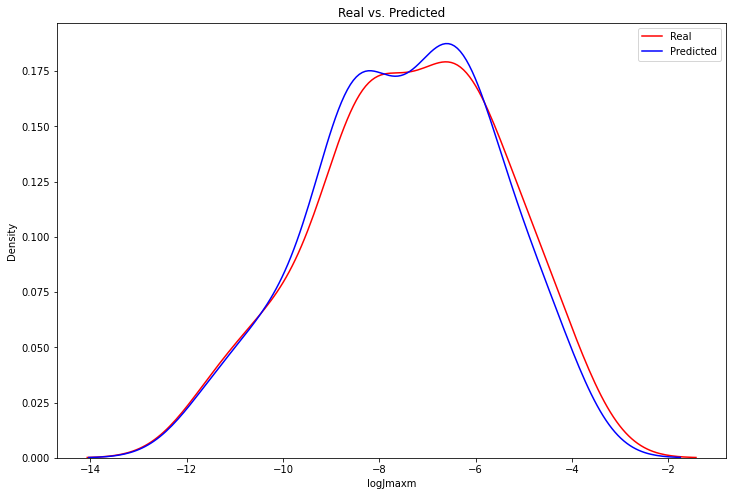

In [16]:
predictions = pipeline_cat.predict(X_test)
DistributionPlot(y_test, predictions, "Real", "Predicted", "Real vs. Predicted")

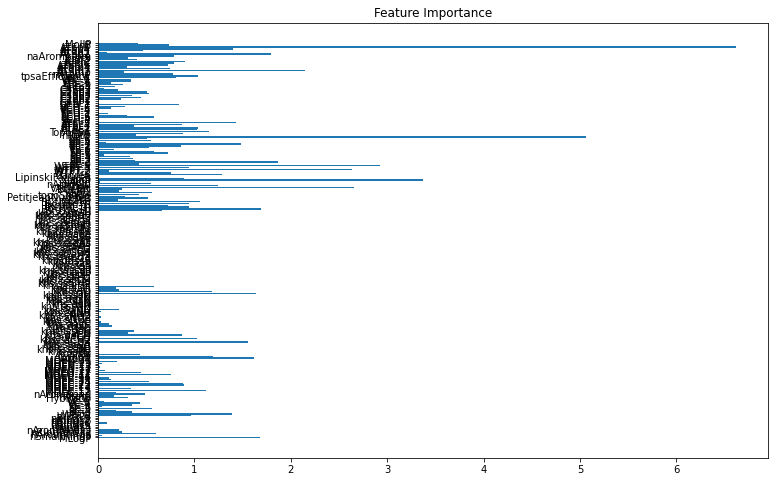

In [ ]:
# # get feature importance
importance = pipeline_cat['cat'].feature_importances_

# plot feature importance
plt.figure(figsize=(12, 8))
plt.barh([x for x in X.columns], importance)
plt.title('Feature Importance')
plt.show()

# 5. Hyperparameter Tuning

In [ ]:
GBR = GradientBoostingRegressor()

parameters = {'learning_rate': [0.0001, 0.001, 0.01, 0.02, 0.03, 0.04, 0.05],
                'subsample'    : [0.9, 0.5, 0.2, 0.1],
                'n_estimators' : [100,500,1000, 1500],
                'max_depth'    : [4,6,8,10]
                }

grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv=5, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.02, max_depth=10, n_estimators=500,
                          subsample=0.2)

 The best score across ALL searched params:
 0.9164469215865514

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 10, 'n_estimators': 500, 'subsample': 0.2}


In [ ]:
RFR = RandomForestRegressor()

parameters = {'n_estimators' : [100,500,1000, 1500],
                'max_depth'    : [4,6,8,10],
                'criterion': ["squared_error", "absolute_error"],
                'max_features': ["auto", "sqrt", "log2"],
            }

grid_RFR = GridSearchCV(estimator=RFR, param_grid=parameters, cv=5, n_jobs=-1)
grid_RFR.fit(X_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_RFR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_RFR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_RFR.best_params_)


 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(criterion='absolute_error', max_depth=10,
                      max_features='sqrt')

 The best score across ALL searched params:
 0.9032530415292959

 The best parameters across ALL searched params:
 {'criterion': 'absolute_error', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}


In [ ]:
XGB = XGBRegressor()

parameters = {
        'min_child_weight': [1, 5, 10], #50, 100
        'gamma': [0.5, 1, 2], #1.5 5
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 6, 9], # 4, 5, 8, 10
        'learning_rate': [0.001, 0.05, 0.01, 0.15],  # 0.2 0.001
        'n_estimators': [100, 500, 500] # 300 1000
        }

grid_XGB = GridSearchCV(estimator=XGB, param_grid=parameters, cv=5, n_jobs=-1)
grid_XGB.fit(X_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_XGB.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_XGB.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_XGB.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=9, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

 The best score across ALL searched params:
 0.9128726597886478

 The best parameters across ALL searched params:
 {'colsample_bytree': 1.0, 'gamma': 0.5, 'learning_rate': 0.05, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 500

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(10, input_shape=[10]))
model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(1))
model.compile(loss='mse', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                110       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test), verbose=2)

Epoch 1/300
12/12 - 1s - loss: 17773.7148 - val_loss: 967.4893 - 1s/epoch - 113ms/step
Epoch 2/300
12/12 - 0s - loss: 15201.9404 - val_loss: 795.0051 - 79ms/epoch - 7ms/step
Epoch 3/300
12/12 - 0s - loss: 13639.3438 - val_loss: 714.8043 - 113ms/epoch - 9ms/step
Epoch 4/300
12/12 - 0s - loss: 13535.9883 - val_loss: 666.2584 - 163ms/epoch - 14ms/step
Epoch 5/300
12/12 - 0s - loss: 13137.5293 - val_loss: 665.9255 - 178ms/epoch - 15ms/step
Epoch 6/300
12/12 - 0s - loss: 10572.3633 - val_loss: 546.3154 - 169ms/epoch - 14ms/step
Epoch 7/300
12/12 - 0s - loss: 9552.0088 - val_loss: 557.8103 - 165ms/epoch - 14ms/step
Epoch 8/300
12/12 - 0s - loss: 8885.0586 - val_loss: 495.0725 - 223ms/epoch - 19ms/step
Epoch 9/300
12/12 - 0s - loss: 7787.0366 - val_loss: 428.5459 - 182ms/epoch - 15ms/step
Epoch 10/300
12/12 - 0s - loss: 6508.9658 - val_loss: 398.8904 - 168ms/epoch - 14ms/step
Epoch 11/300
12/12 - 0s - loss: 6482.9097 - val_loss: 367.2913 - 172ms/epoch - 14ms/step
Epoch 12/300
12/12 - 0s - los

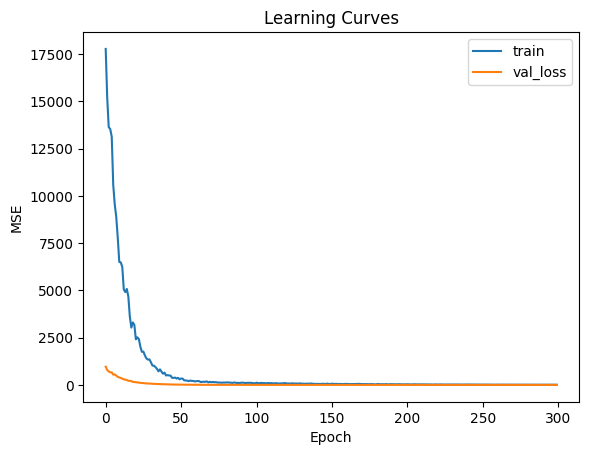

In [ ]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(X_test)

# MAE, MSE, RMSE
print("MAE: {}".format(mean_absolute_error(y_test, predictions)))
print("MSE: {}".format(mean_squared_error(y_test, predictions)))
print("RMSE: {}\n".format(mean_squared_error(y_test, predictions, squared=False)))

3/3 [==============================] - 0s 6ms/step
MAE: 1.2094342897858261
MSE: 2.7120901040476375
RMSE: 1.6468424648543762



In [ ]:
X_train.columns

Index(['MWa', 'logKowb', 'Mptc', 'LogSaqd', 'LogSoce', 'Hdf', 'Hag', 'MVh',
       'Texpi', 'Skin thicknessj'],
      dtype='object')